# Facebook Campaign Analysis

## First look at data

In [1]:
# Importing useful libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the data

df = pd.read_csv('~/Desktop/Data/KAG_conversion_data.csv')

In [3]:
# Taking a look at the dataset

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
# Let's rename the columns, the inconsistent capitalizations are making me uncomfortable.

df.rename(columns = {'Impressions': 'impressions', 'Clicks':'clicks', 'Spent':'spent',\
                     'Total_Conversion':'total_conversion','Approved_Conversion':'approved_conversion'},\
          inplace=True)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [5]:
# Create a new column with combined gender, age, and interest data, for a highly specified segment

templist = []
newcol = []
s = ', '

for i in range(len(df)):
    templist.append(df.loc[i, 'age'])
    templist.append(df.loc[i, 'gender'])
    templist.append(df.loc[i, 'interest'])
    newcol.append(s.join(str(n) for n in templist))
    templist = []
    
df.insert(10, 'segment', newcol)

## Gender 

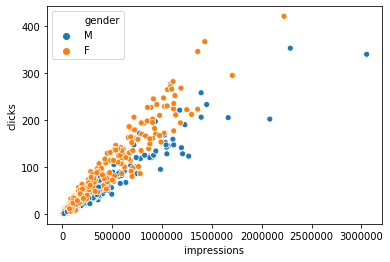

In [6]:
sns.scatterplot(data=df, x='impressions', y='clicks', hue='gender')

The above graph shows that women were somewhat more likely to click per impression than men.

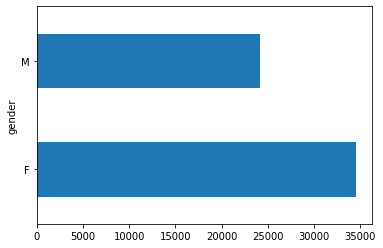

In [7]:
df.groupby(['gender'])['spent'].sum().plot(kind='barh')

More was spent on women than men in total.

## Looking at the age groups

Text(0.5, 1.0, 'Total Conversion per Age Group')

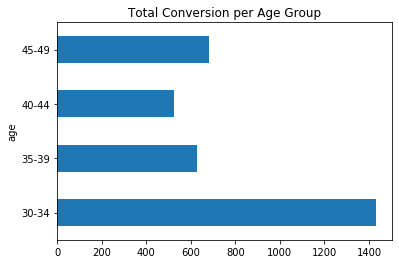

In [8]:
plt.figure(1)
df.groupby(['age'])['total_conversion'].sum().plot(kind='barh').set_title('Total Conversion per Age Group')

In [9]:
# Let's see which age group is more expensive per conversion

# First let's group by age and include only the numerical columns.

agedf = df.groupby(by=['age']).sum()
agedf = agedf[['impressions', 'clicks', 'spent', 'total_conversion', 'approved_conversion']]
agedf.head()


# Let's add a column to calculate the amount spent per conversion for each age group
agedf['spent_per_conversion'] = agedf['spent'] / agedf['total_conversion']
agedf.head()

,impressions,clicks,spent,total_conversion,approved_conversion,spent_per_conversion
age,,,,,,
30-34,67993019,9483,15252.399986,1431,494,10.658560
35-39,42104644,7094,11112.429994,626,207,17.751486
40-44,39604307,7736,11589.729981,523,170,22.160096
45-49,63732858,13852,20750.669997,684,208,30.337237


This shows that the most expensive age group per conversion was the 45-49 group.

## Looking at more specific segments

In [10]:
# Grouping by specific segment and calculating how much was spent per conversion

segdf= df.groupby(by=['segment']).sum()
segdf['spent_per_conversion'] = segdf['spent'] / segdf['total_conversion']
segdf = segdf[['impressions', 'clicks', 'spent', 'total_conversion', 'spent_per_conversion']]


## Sort segments by amound spent per conversion

segdf.sort_values(by=['spent_per_conversion'], ascending=False).head(20)

,impressions,clicks,spent,total_conversion,spent_per_conversion
segment,,,,,
"40-44, F, 111",402975,83,120.899998,1,120.899998
"45-49, F, 22",658504,164,222.579997,2,111.289998
"40-44, M, 25",264222,63,87.790000,1,87.790000
"45-49, F, 18",2717959,670,990.860003,13,76.220000
"40-44, F, 102",329333,48,67.609999,1,67.609999
"45-49, F, 15",1313682,327,470.169998,7,67.167143
"45-49, F, 23",285656,90,125.270001,2,62.635001
"45-49, M, 32",2114362,429,780.409998,13,60.031538
"45-49, F, 110",637549,120,173.880003,3,57.960001


These are the top 20 most expensive segments per conversion, for specific interest, age group, and gender.

In [11]:
## Sort segments by amound spent per conversion

segdf.sort_values(by=['spent'], ascending=False).head(20)

,impressions,clicks,spent,total_conversion,spent_per_conversion
segment,,,,,
"45-49, F, 16",5547393,1321,1888.630003,43,43.921628
"45-49, M, 16",6110946,941,1617.980005,51,31.725098
"45-49, F, 27",3699386,942,1403.950000,42,33.427381
"35-39, F, 16",5345242,919,1396.279995,55,25.386909
"45-49, F, 10",3475155,888,1228.540005,35,35.101143
"45-49, F, 29",3031766,791,1085.169995,38,28.557105
"30-34, F, 27",3786921,690,1018.990003,73,13.958767
"35-39, M, 28",3578305,553,992.170002,30,33.072333
"45-49, F, 18",2717959,670,990.860003,13,76.220000


These are the 20 segments by age group, gender, and interest in which the company spent the most.

In [12]:
# Segments that had conversions without any spent on ads

segdf.query('spent == 0 & total_conversion != 0')

,impressions,clicks,spent,total_conversion,spent_per_conversion
segment,,,,,
"35-39, F, 23",1030,0,0.0,1,0.0
"40-44, M, 21",7073,0,0.0,1,0.0


These are the segments for which the company spent no money and still achieved a conversion.

In [13]:
segdf.query('spent != 0 & total_conversion == 0')

,impressions,clicks,spent,total_conversion,spent_per_conversion
segment,,,,,


Fortunately the company didnt spend any money for segments that did not convert.

In part II I will look at which segments are exhibiting diminishing results and which ones are improving.